In [2]:
%cd /home/gianscarpe/dev/event-camera/src

/home/gianscarpe/dev/event-camera/src


In [3]:
from experimenting.dataset import AutoEncoderConstructor, get_dataloader
import os
from omegaconf import DictConfig
from matplotlib import pyplot as plt

In [7]:
from experimenting.utils import get_file_paths

In [8]:
homedir = '/data/gscarpellini/'
dataset = 'nturgb+d_rgb_s018'
exp_dataset = 'voxelgrid'


data_dir = homedir
labels_dir = os.path.join(homedir, dataset, "labels_full_joints/")

test_subjects = []
cams = [3]

batch_size = 16

hparams = DictConfig({'dataset':{'data_dir': data_dir, 'core_class': 'NTUCore', 'save_split':False, 'test_subjects':test_subjects, 'split_at':0.8, 'cams': cams}, 
                       'augmentation_test': {'info':{'in_shape':[260, 346]}, 'apply':{'aug_1': {'cls': 'albumentations.pytorch.ToTensor'}}},
                      'augmentation_train': {'info':{'in_shape':[260, 346]}, 'apply':{'aug_1': {'cls': 'albumentations.pytorch.ToTensor'}}}
                     })

In [9]:
factory = AutoEncoderConstructor(hparams)
train, val, test = factory.get_datasets()

KeyboardInterrupt: 

In [ ]:
loader = get_dataloader(val, batch_size, shuffle=False, num_workers=2)

In [10]:
path = '/home/gianscarpe/Pictures/input/S018C001P044R001A107_rgb/imgs/'

In [11]:
import numpy as np

In [12]:
import cv2
import glob

(0.0, 1.0, 0.0, 1.0)

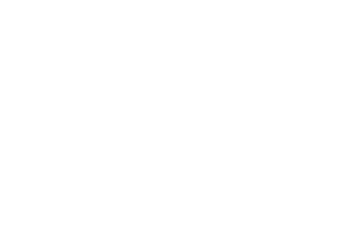

In [13]:
plt.axis('off')

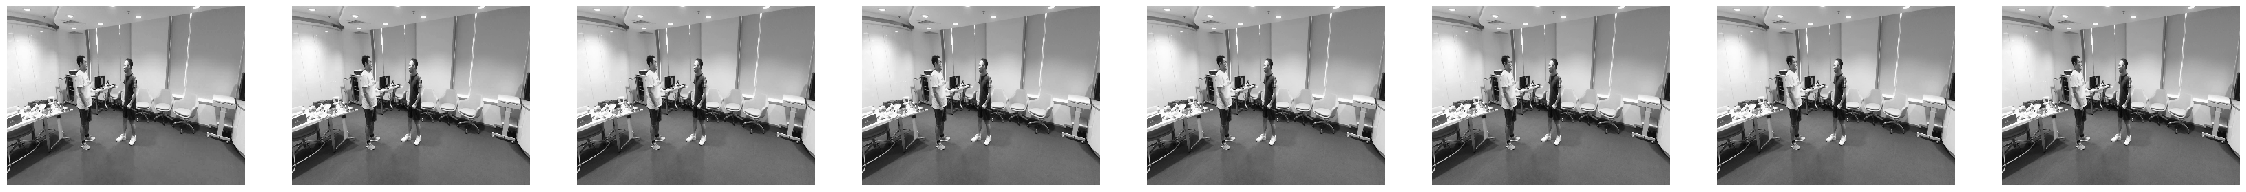

In [35]:
fig, ax = plt.subplots(ncols=8, nrows=1, figsize=(40, 40))

for i, img in enumerate(sorted(os.listdir(path))[:8]):
        x = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        ax[i].axis('off')
        ax[i].imshow(x, cmap='gray')
plt.show()


In [29]:
x

array([[187, 188, 188, ..., 124, 124, 124],
       [186, 186, 186, ..., 124, 124, 124],
       [185, 185, 185, ..., 124, 124, 123],
       ...,
       [ 96,  96,  93, ..., 108, 108, 108],
       [ 95,  94,  99, ..., 111, 105, 110],
       [ 93,  96,  95, ..., 102, 109, 109]], dtype=uint8)

In [149]:
writer = cv2.VideoWriter("ntu.avi", cv2.VideoWriter_fourcc(*"MJPG"), 3,
                         (432, 288))
images = sorted(glob.glob("*.png"))
for frame in images:
    im = cv2.imread(frame)
    writer.write(im.astype('uint8'))
writer.release()



In [170]:
path = '/data/gscarpellini/test/npy_dataset_7500_events/346x260/'
listdir = sorted(os.listdir(path))

In [339]:
sorted(os.listdir(path))[:10]

['S1_session_1_mov_1_7500_events_frame_-1_cam_0_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_-1_cam_1_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_-1_cam_2_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_-1_cam_3_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_0_cam_0_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_0_cam_1_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_0_cam_2_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_0_cam_3_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_10_cam_0_timesurface.mat',
 'S1_session_1_mov_1_7500_events_frame_10_cam_1_timesurface.mat']

In [354]:
def visualize(path, n_count=10, subject=1, cam=2, mov=1, session=1):
    listdir = sorted(os.listdir(path))
    count = 0

    fig, axs = plt.subplots(nrows=1, ncols=n_count, figsize=(n_count*10,10))

    for current_path in listdir:  
        if f'cam_{cam}' not in current_path or f'session_{session}' not in current_path or f'mov_{mov}' not in current_path or f'S{subject}_' not in current_path:
            continue
        if count >= n_count:
            break
        plt.sca(axs[count])
        count+=1
        plt.axis('off')
        im = DHP19Core.load_frame(os.path.join(path, current_path)).squeeze()
        plt.imshow((im))
    plt.show()
    
    

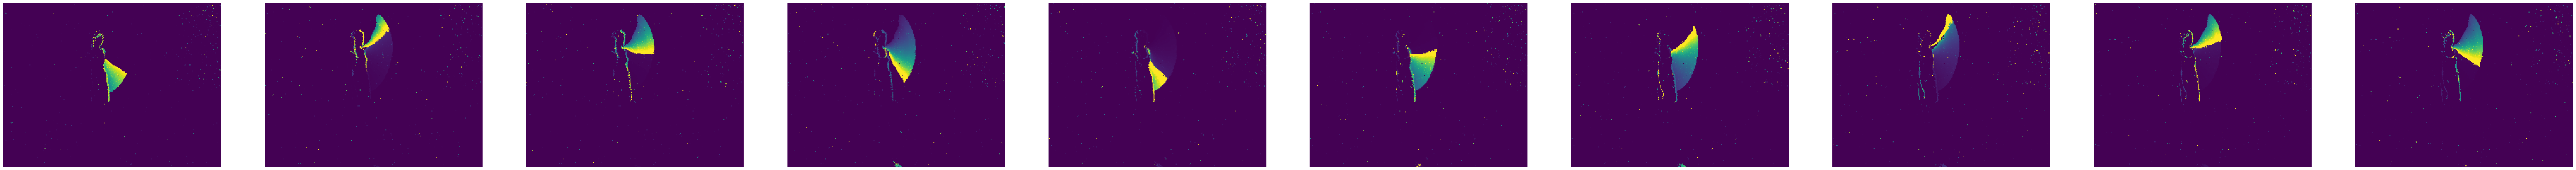

In [355]:
path = '/data/gscarpellini/timesurface/npy_dataset_7500_events/346x260/'
visualize(path)

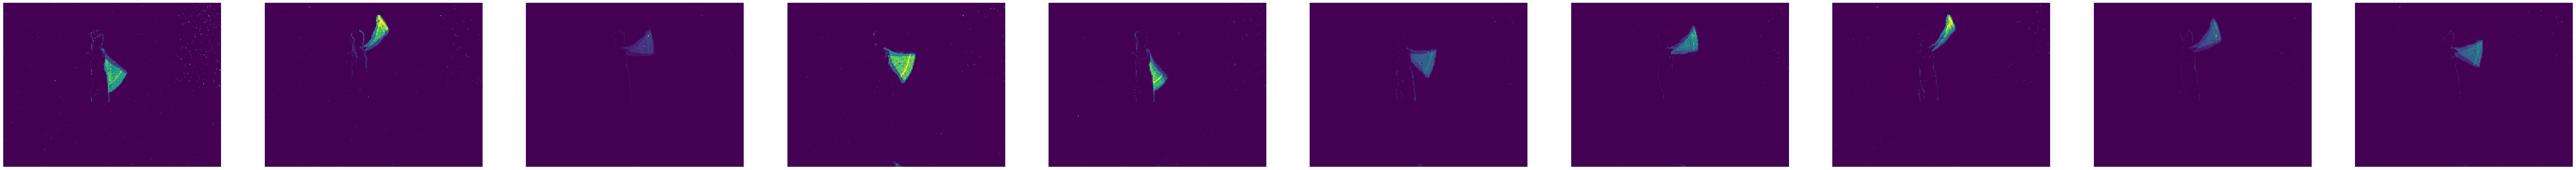

In [356]:
path = '/data/gscarpellini/dhp19/time_count_dataset/movements_per_frame'
visualize(path)

In [177]:
from experimenting.dataset.core import DHP19Core
from scipy import io


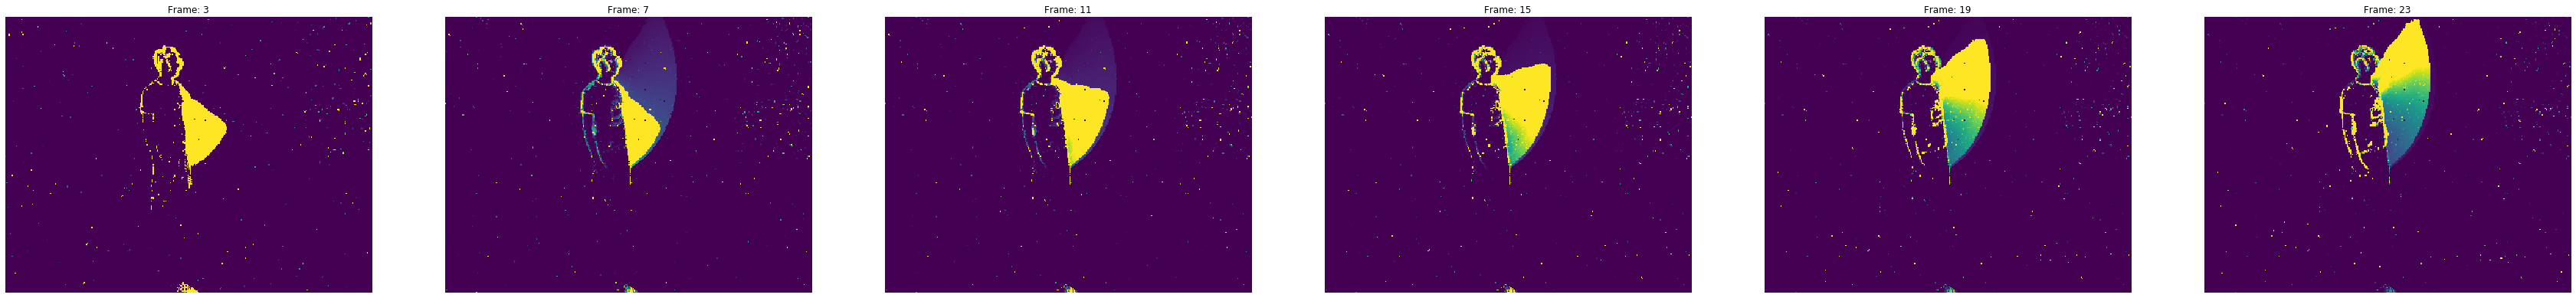

In [363]:
path = '/data/gscarpellini/ts_d30/npy_dataset_7500_events/346x260/'
listdir = sorted(os.listdir(path))
count = 0
n_count = 6
fig, axs = plt.subplots(nrows=1, ncols=n_count, figsize=(n_count*10,10))


for i in range(100):
    if 'cam_2' not in listdir[i]:
        continue
    if count >= n_count:
        break
    plt.sca(axs[count])
    count+=1
    plt.axis('off')
    im = io.loadmat(os.path.join(path, listdir[i]))['I3n'].transpose(1, 0)
    plt.imshow((im))
    #plt.colorbar()
    plt.title('Frame: {}'.format(i+1))
plt.show()

S10_session_1_mov_1_7500_events_frame_0_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_10_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_11_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_12_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_13_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_14_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_15_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_16_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_17_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_18_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_19_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_1_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_20_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_21_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_22_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_23_cam_2_timesurfac

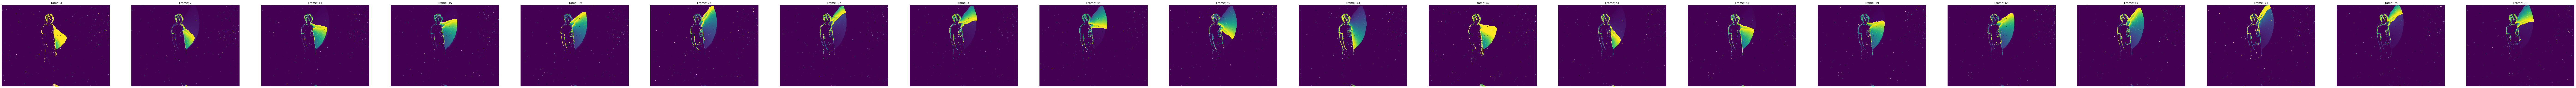

In [331]:
path = '/data/gscarpellini/ts_diff_d30/npy_dataset_7500_events/346x260/'
listdir = sorted(os.listdir(path))
count = 0
n_count = 20
fig, axs = plt.subplots(nrows=1, ncols=n_count, figsize=(n_count*10,10))


for i in range(100):
    if 'cam_2' not in listdir[i]:
        continue
    if count >=n_count:
        break
    plt.sca(axs[count])
    count+=1
    plt.axis('off')
    print(listdir[i])
    im = io.loadmat(os.path.join(path, listdir[i]))['I3n'].transpose(1, 0)
    plt.imshow((im))
    #plt.colorbar()
    plt.title('Frame: {}'.format(i+1))
plt.show()

S10_session_1_mov_1_7500_events_frame_0_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_100_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_101_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_102_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_103_cam_2_timesurface.mat
S10_session_1_mov_1_7500_events_frame_104_cam_2_timesurface.mat


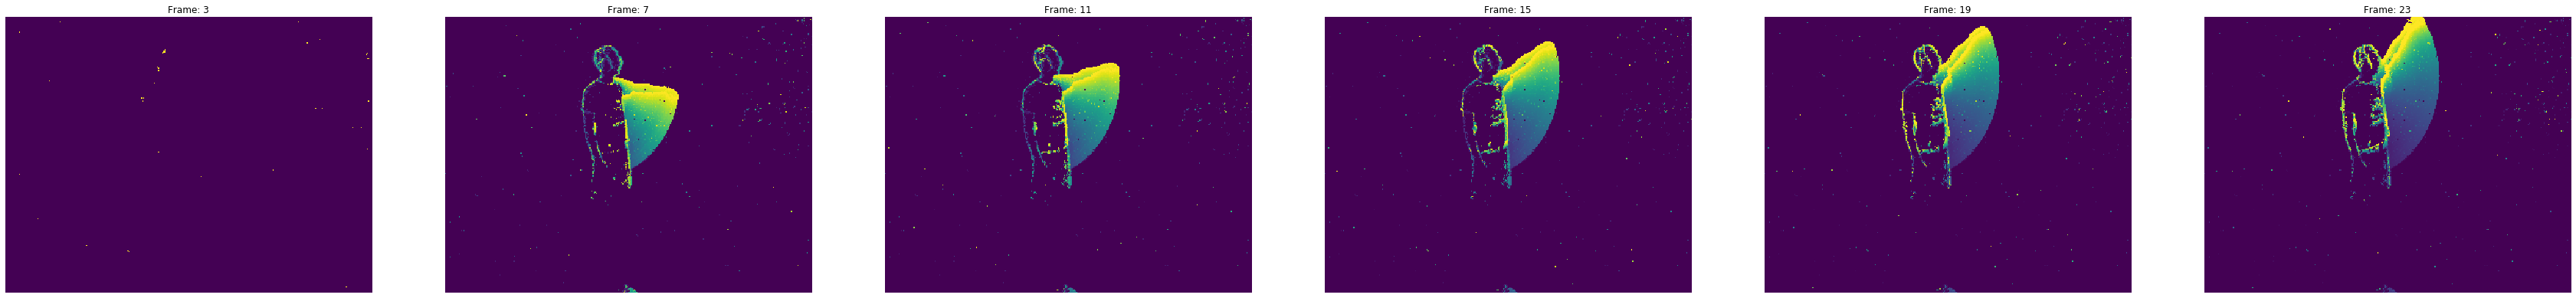

In [362]:
path = '/data/gscarpellini/ts_diff_d30_300fps/npy_dataset_7500_events/346x260/'
listdir = sorted(os.listdir(path))
count = 0
n_count = 6
fig, axs = plt.subplots(nrows=1, ncols=n_count, figsize=(n_count*10,10))


for i in range(100):
    if 'cam_2' not in listdir[i]:
        continue
    if count >= n_count:
        break
    plt.sca(axs[count])
    count+=1
    plt.axis('off')
    print(listdir[i])
    im = io.loadmat(os.path.join(path, listdir[i]))['I3n'].transpose(1, 0)
    plt.imshow((im))
    #plt.colorbar()
    plt.title('Frame: {}'.format(i+1))
plt.show()

In [357]:
def plot_voxel(im):
    voxel_depth = 4
    fig, axs = plt.subplots(nrows=1, ncols=voxel_depth, figsize=(voxel_depth*10,4))
    for i in range(voxel_depth):
        plt.sca(axs[i])
        plt.axis('off')
        plt.imshow((im.squeeze())[i])

In [359]:
import torch

In [360]:
with torch.no_grad():
    count = 0
    for im in sorted(os.listdir(path)):
        if "S1_" not in im:
            continue
        count+=1
        if count > 10:
            break
        x = torch.Tensor(DHP19Core.load_frame(os.path.join(path, im))).transpose(-1, 0).transpose(1, -1)
        x = x.unsqueeze(0)
        out = fmodel(x)
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        plt.sca(axs[0])
        plt.axis('off')
        plt.title('Input')
        plot_voxel(x)
        plt.sca(axs[1])
        plt.axis('off')
        plt.imshow((out.squeeze())[3])
        plt.title('AE reconstruction')
        plt.show()

NameError: name 'fmodel' is not defined

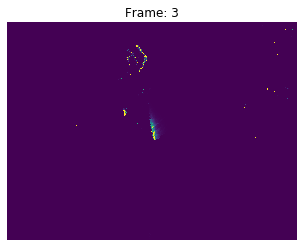

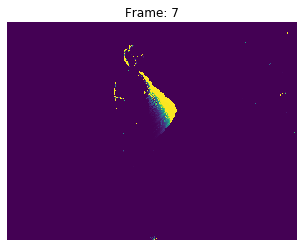

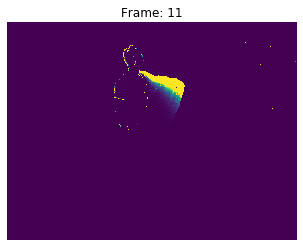

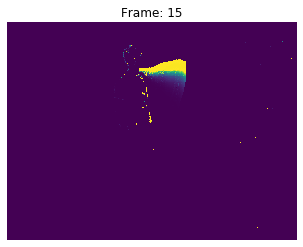

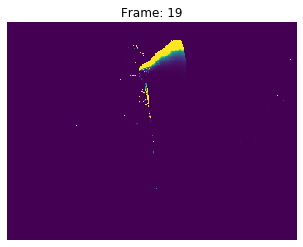

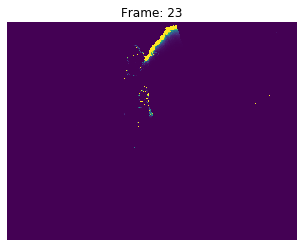

In [207]:
    path = '/data/gscarpellini/test/npy_dataset_7500_events/346x260/'
    listdir = sorted(os.listdir(path))
    count = 0
    for i in range(100):
        if 'cam_2' not in listdir[i]:
            continue
        if count > 5:
            break
        count+=1
        plt.figure()
        plt.axis('off')
        im = io.loadmat(os.path.join(path, listdir[i]))['I3n'].transpose(1, 0)
        plt.imshow((im))
        #plt.colorbar()
        plt.title('Frame: {}'.format(i+1))
    plt.show()

/home/gianscarpe/anaconda3/envs/event-camera/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


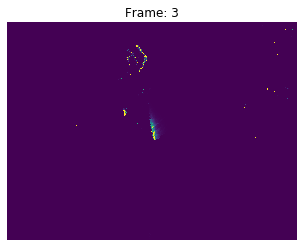

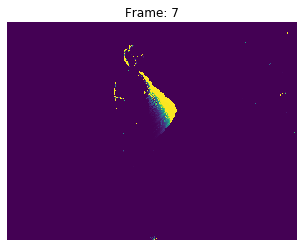

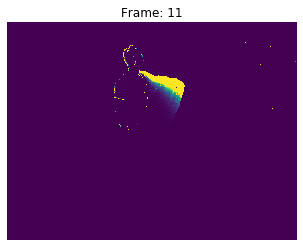

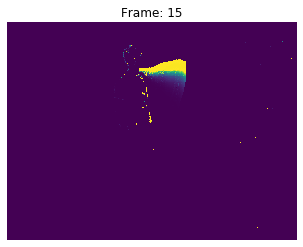

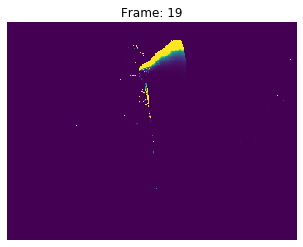

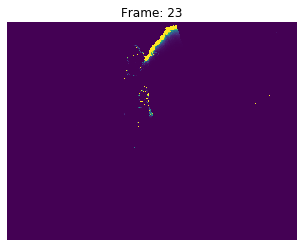

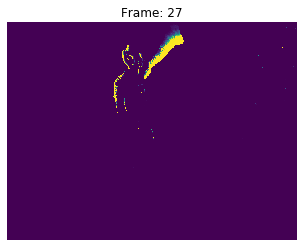

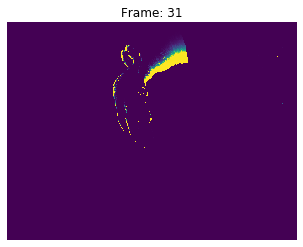

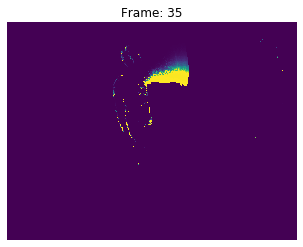

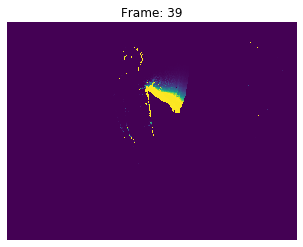

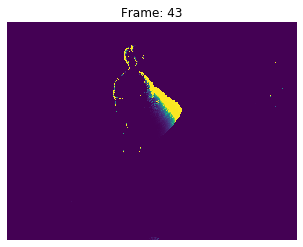

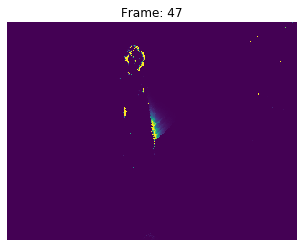

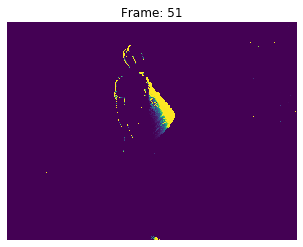

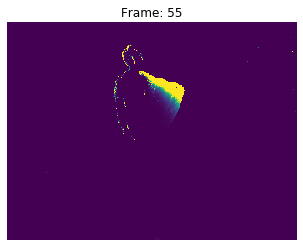

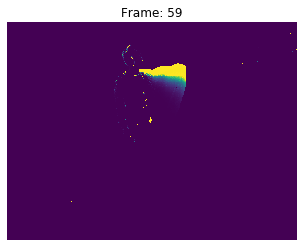

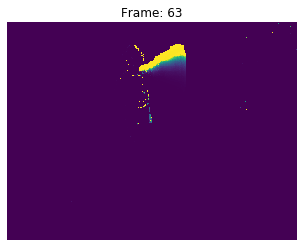

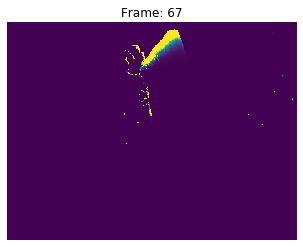

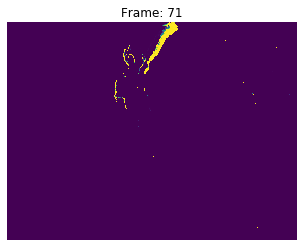

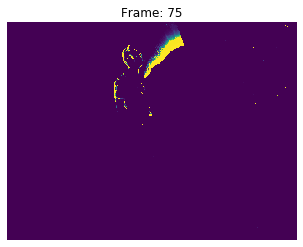

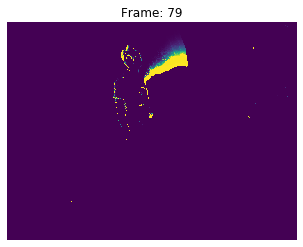

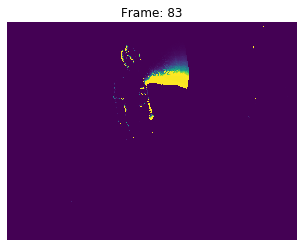

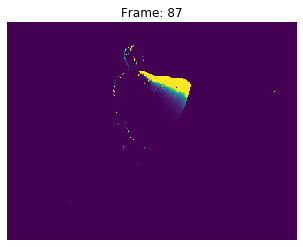

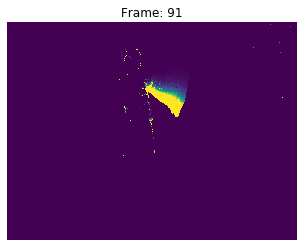

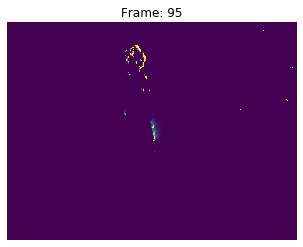

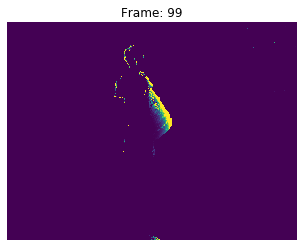

In [199]:
    path = '/data/gscarpellini/test/npy_dataset_7500_events/346x260/'
    listdir = sorted(os.listdir(path))
    count = 0
    for i in range(100):
        if 'cam_2' not in listdir[i]:
            continue
        if count > 10:
            break
        plt.figure()
        plt.axis('off')
        im = io.loadmat(os.path.join(path, listdir[i]))['I3n'].transpose(1, 0)
        plt.imshow((im))
        #plt.colorbar()
        plt.title('Frame: {}'.format(i+1))
    plt.show()

In [81]:
i = cv2.imread('./in-deg-dist.png')

15